## Zadanie 3

Poniższa tabela przedstawia zależność pomiędzy <b>Sprzedażą</b> produktu X a <b>Inwestycjami</b> w komunikację mediową (marketing) tego produktu.

| Inwestycje | Sprzedaż |
|--------|-------------|
| 10000 | 0.19 |
| 15000 | 0.36 |
| 30000 | 0.29 |
| 50000 | 0.38 |
| 60000 | 0.34 |
| 90000 | 1.13 |
| 100000 | 1.21 |
| 120000 | 1.56 |
| 140000 | 2.17 |
| 150000 | 1.92 |
| 225000 | 2.14 |
| 300000 | 2.43 |
| 400000 | 2.53 |


Twoim zadaniem jest znalezienie zależności pomiędzy tymi dwoma zmiennymi - dopasowanie postaci funkcyjnej zależności Sprzedaży od Inwestycji w taki sposób, aby najlepiej dopasowywała się do danych w tabeli. Prosimy o przedstawienie Twojego toku działań (sposobów znalezenia takiej postaci funkcyjnej oraz metod ich ewaluacji), a także wybór końcowej postaci funkcyjej wraz z oszacowanymi parametrami oraz wizualizacja wyników. Jaką wartość sprzedaży przewidujesz dla inwestycji na poziomie 20000, a jaką dla 450000?

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import seaborn as sns

In [278]:
data = {
    'Inwestycje': [10000, 15000, 30000, 50000, 60000, 90000, 100000, 120000, 140000, 150000, 225000, 300000, 400000],
    'Sprzedaż': [0.19, 0.36, 0.29, 0.38, 0.34, 1.13, 1.21, 1.56, 2.17, 1.92, 2.14, 2.43, 2.53]
}
df = pd.DataFrame(data)

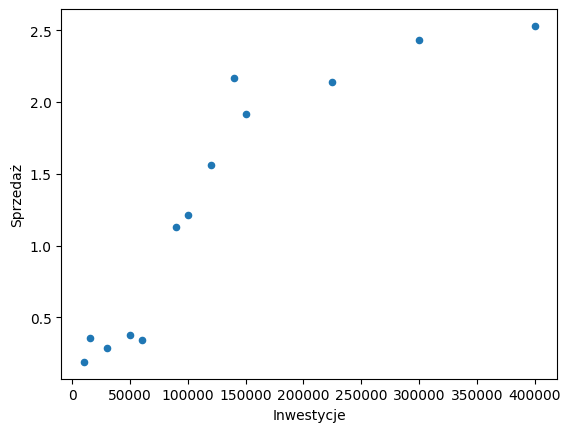

In [279]:
df.plot(kind='scatter', x='Inwestycje', y='Sprzedaż')
plt.show()

In [280]:
correlation = df.corr()

In [281]:
y = df['Sprzedaż'].values
X = df['Inwestycje'].values.reshape(-1, 1)
X

array([[ 10000],
       [ 15000],
       [ 30000],
       [ 50000],
       [ 60000],
       [ 90000],
       [100000],
       [120000],
       [140000],
       [150000],
       [225000],
       [300000],
       [400000]], dtype=int64)

In [282]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_pred_lin = lin_reg.predict(X)
r2_lin_reg = r2_score(y, y_pred_lin)
r2_lin_reg

0.7920446525305497

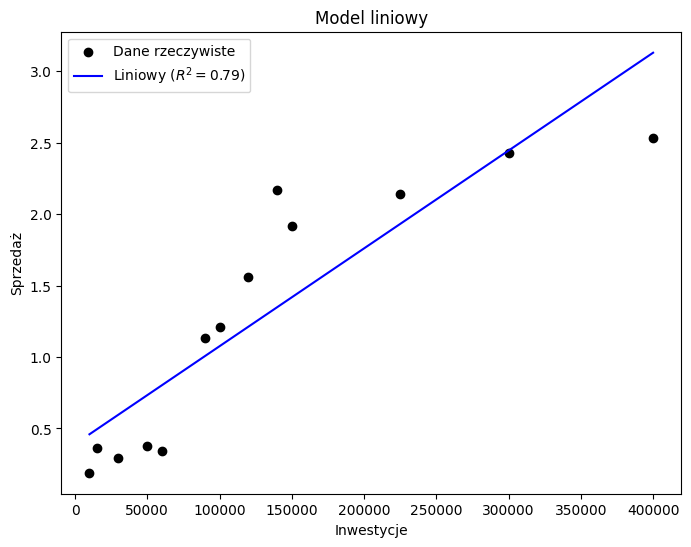

In [283]:
plt.figure(figsize=(8,6))
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_lin, color='blue', label=f'Liniowy ($R^2={r2_lin_reg:.2f}$)')
plt.title('Model liniowy')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.show()

In [284]:
X_log = np.log(df['Inwestycje']).values.reshape(-1, 1)
log_model = LinearRegression()
log_model.fit(X_log, y)
y_pred_log = log_model.predict(X_log)
r2_log = r2_score(y, y_pred_log)
r2_log

0.8329083736196824

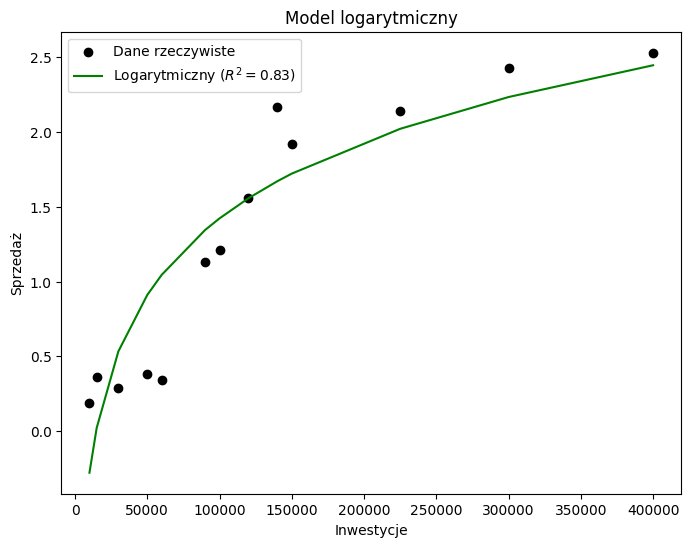

In [285]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_log, color='green', label=f'Logarytmiczny ($R^2={r2_log:.2f}$)')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.title('Model logarytmiczny')
plt.show()

In [286]:
X_exp = df['Inwestycje'].values
y_log = np.log(y)
exp_model = LinearRegression()
exp_model.fit(X_exp.reshape(-1, 1), y_log)
y_pred_exp = np.exp(exp_model.predict(X_exp.reshape(-1, 1)))
r2_exp = r2_score(y, y_pred_exp)

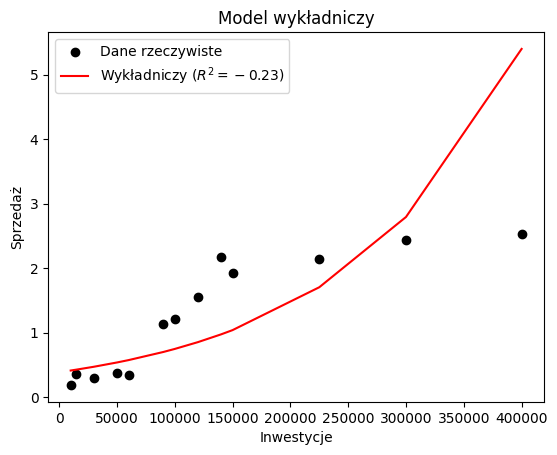

In [287]:
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_exp, color='red', label=f'Wykładniczy ($R^2={r2_exp:.2f}$)')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.title('Model wykładniczy')
plt.show()

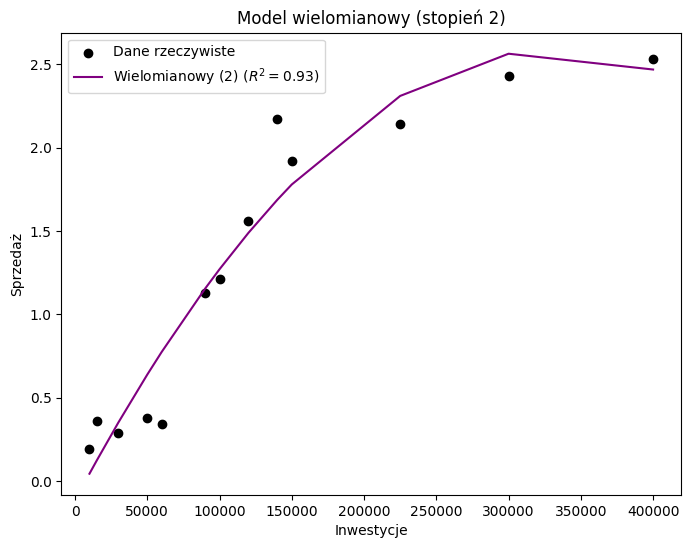

In [288]:
poly_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_2.fit_transform(X)
poly_model_2 = LinearRegression()
poly_model_2.fit(X_poly_2, y)
y_pred_poly_2 = poly_model_2.predict(X_poly_2)
r2_poly_2 = r2_score(y, y_pred_poly_2)

plt.figure(figsize=(8, 6))
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_poly_2, color='purple', label=f'Wielomianowy (2) ($R^2={r2_poly_2:.2f}$)')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.title('Model wielomianowy (stopień 2)')
plt.show()

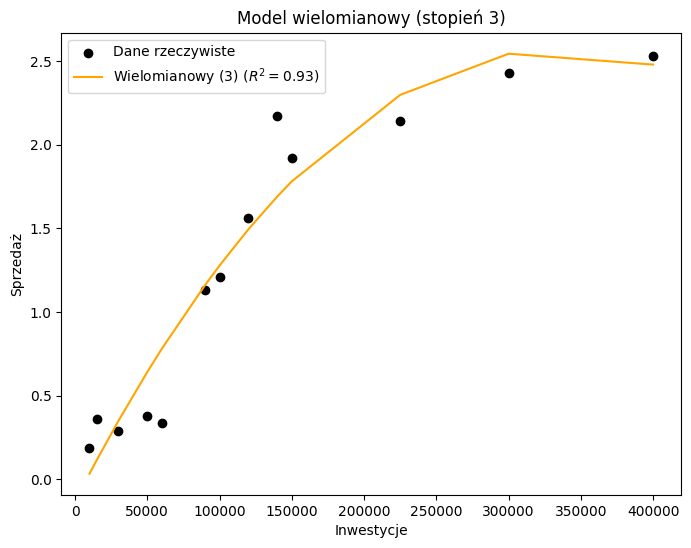

In [289]:
poly_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_3.fit_transform(X)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_poly_3, y)
y_pred_poly_3 = poly_model_3.predict(X_poly_3)
r2_poly_3 = r2_score(y, y_pred_poly_3)

plt.figure(figsize=(8, 6))
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_poly_3, color='orange', label=f'Wielomianowy (3) ($R^2={r2_poly_3:.2f}$)')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.title('Model wielomianowy (stopień 3)')
plt.show()

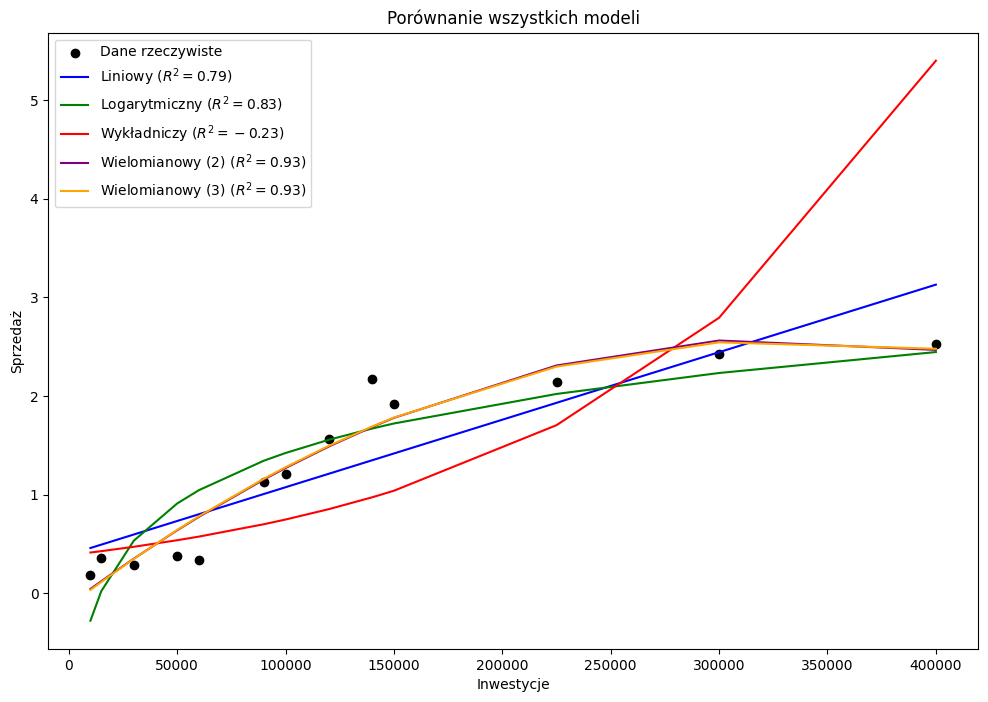

In [290]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_lin, color='blue', label=f'Liniowy ($R^2={r2_lin_reg:.2f}$)')
plt.plot(df['Inwestycje'], y_pred_log, color='green', label=f'Logarytmiczny ($R^2={r2_log:.2f}$)')
plt.plot(df['Inwestycje'], y_pred_exp, color='red', label=f'Wykładniczy ($R^2={r2_exp:.2f}$)')
plt.plot(df['Inwestycje'], y_pred_poly_2, color='purple', label=f'Wielomianowy (2) ($R^2={r2_poly_2:.2f}$)')
plt.plot(df['Inwestycje'], y_pred_poly_3, color='orange', label=f'Wielomianowy (3) ($R^2={r2_poly_3:.2f}$)')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.title('Porównanie wszystkich modeli')
plt.show()

In [291]:
investment_1 = 20000
investment_2 = 450000
investment_3 = 600000

# Model liniowy
prediction_1_lin_reg = lin_reg.predict([[investment_1]])[0]
prediction_2_lin_reg = lin_reg.predict([[investment_2]])[0]
prediction_3_lin_reg = lin_reg.predict([[investment_3]])[0]

# Model logarytmiczny
prediction_1_log = log_model.predict(np.log([[investment_1]]))[0]
prediction_2_log = log_model.predict(np.log([[investment_2]]))[0]
prediction_3_log = log_model.predict(np.log([[investment_3]]))[0]

# Model wykładniczy
prediction_1_exp = np.exp(exp_model.predict(np.log([[investment_1]])))[0]
prediction_2_exp = np.exp(exp_model.predict(np.log([[investment_2]])))[0]
prediction_3_exp = np.exp(exp_model.predict(np.log([[investment_3]])))[0]

# Modele wielomianowe
prediction_1_poly_2 = poly_model_2.predict(poly_2.transform([[investment_1]]))[0]
prediction_2_poly_2 = poly_model_2.predict(poly_2.transform([[investment_2]]))[0]
prediction_3_poly_2 = poly_model_2.predict(poly_2.transform([[investment_3]]))[0]

prediction_1_poly_3 = poly_model_3.predict(poly_3.transform([[investment_1]]))[0]
prediction_2_poly_3 = poly_model_3.predict(poly_3.transform([[investment_2]]))[0]
prediction_3_poly_3 = poly_model_3.predict(poly_3.transform([[investment_3]]))[0]

# Rezultaty
results = {
    'Model': ['Liniowy', 'Logarytmiczny', 'Wykładniczy', 'Wielomianowy (2)', 'Wielomianowy (3)'],
    'R2': [r2_lin_reg, r2_log, r2_exp, r2_poly_2, r2_poly_3],
    'Prognoza 20000': [prediction_1_lin_reg, prediction_1_log, prediction_1_exp, prediction_1_poly_2, prediction_1_poly_3],
    'Prognoza 450000': [prediction_2_lin_reg, prediction_2_log, prediction_2_exp, prediction_2_poly_2, prediction_2_poly_3],
    'Prognoza 600000': [prediction_3_lin_reg, prediction_3_log, prediction_3_exp, prediction_3_poly_2, prediction_3_poly_3]
}

results_df = pd.DataFrame(results)
print(results_df)

              Model        R2  Prognoza 20000  Prognoza 450000  \
0           Liniowy  0.792045        0.527555         3.471939   
1     Logarytmiczny  0.832908        0.233799         2.533168   
2       Wykładniczy -0.227168        0.387033         0.387040   
3  Wielomianowy (2)  0.932566        0.199917         2.235511   
4  Wielomianowy (3)  0.932669        0.194280         2.289733   

   Prognoza 600000  
0         4.499050  
1         2.745624  
2         0.387041  
3         0.796343  
4         1.150385  


Nowy Model Logarytmiczny dla wartości powyżej 200 tyś. 

In [292]:
data = {
    'Inwestycje': [225000, 300000, 400000],
    'Sprzedaż': [2.14, 2.43, 2.53]
}
df_new = pd.DataFrame(data)

X = df_new[['Inwestycje']].values
y = df_new['Sprzedaż'].values

X_log = np.log(X)

log_model_new = LinearRegression()
log_model_new.fit(X_log, y)
y_pred_new_log = log_model_new.predict(X_log)
r2_log_new = r2_score(y, y_pred_new_log)
r2_log_new

0.9266856214459784

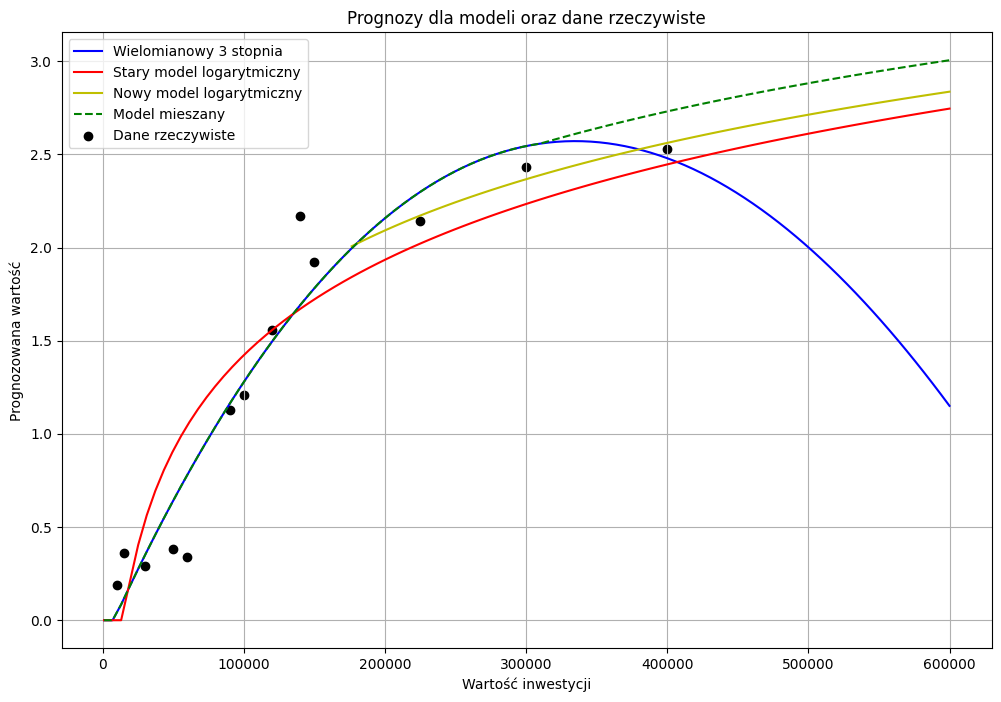

In [293]:
def predict_investment_log_new(investment):
    if investment >= 175000:
        return max(log_model_new.predict(np.log([[investment]]))[0], 0) if investment > 0 else 0

def predict_investment_poly(investment):
    return max(poly_model_3.predict(poly_3.transform([[investment]]))[0], 0)

def predict_investment_log_old(investment):
    return max(log_model.predict(np.log([[investment]]))[0], 0) if investment > 0 else 0

investment_range = np.linspace(1000, 600000, 100)

predictions_poly = [predict_investment_poly(inv) for inv in investment_range]
predictions_log_old = [predict_investment_log_old(inv) for inv in investment_range]
predictions_log_new = [predict_investment_log_new(inv) for inv in investment_range]

height_at_310k = predict_investment_poly(310000)

investment_range_mixed = np.linspace(1000, 600000, 100)
predictions_mixed = [predict_investment_poly(inv) if inv <= 310000 else
                     predict_investment_log_new(inv) + (height_at_310k - predict_investment_log_new(310000)) for inv in investment_range_mixed]

plt.figure(figsize=(12, 8))
plt.plot(investment_range, predictions_poly, label='Wielomianowy 3 stopnia', color='b')
plt.plot(investment_range, predictions_log_old, label='Stary model logarytmiczny', color='r')
plt.plot(investment_range, predictions_log_new, label='Nowy model logarytmiczny', color='y')
plt.plot(investment_range_mixed, predictions_mixed, label='Model mieszany', color='g', linestyle='--')
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='k', marker='o', label='Dane rzeczywiste')
plt.title('Prognozy dla modeli oraz dane rzeczywiste')
plt.xlabel('Wartość inwestycji')
plt.ylabel('Prognozowana wartość')
plt.legend()
plt.grid(True)
plt.show()

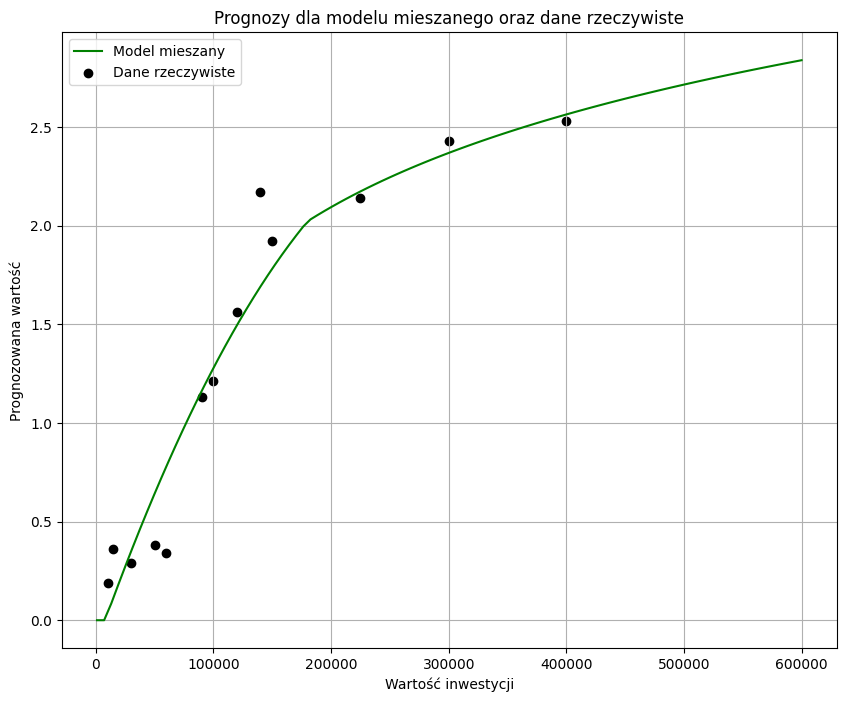

R^2 dla modelu mieszanego: 0.93


In [294]:
def predict_investment_log_new(investment):
    return log_model_new.predict(np.log([[investment]]))[0]

def predict_investment_poly(investment):
    return poly_model_3.predict(poly_3.transform([[investment]]))[0]

def predict_investment_mixed(investment):
    if investment <= 180000:
        return max(predict_investment_poly(investment), 0)
    else:
        return max(predict_investment_log_new(investment) + (height_at_175 - predict_investment_log_new(180000)), 0)

height_at_175 = predict_investment_poly(180000)
investment_range = np.linspace(1000, 600000, 100)
predictions_mixed = [predict_investment_mixed(inv) for inv in investment_range]

X_mixed = np.concatenate([X, np.array([[180000]])])
y_mixed = np.concatenate([y, np.array([predict_investment_poly(180000)])])

predictions_mixed_data = np.array([predict_investment_mixed(x[0]) for x in X])

r2_mixed = r2_score(y, predictions_mixed_data[:len(y)])

plt.figure(figsize=(10,8))
plt.plot(investment_range, predictions_mixed, label='Model mieszany', color='g')
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='k', marker='o', label='Dane rzeczywiste')
plt.title('Prognozy dla modelu mieszanego oraz dane rzeczywiste')
plt.xlabel('Wartość inwestycji')
plt.ylabel('Prognozowana wartość')
plt.legend()
plt.grid(True)
plt.show()

print(f'R^2 dla modelu mieszanego: {r2_mixed:.2f}')

In [295]:
def predict_investment_log_new(investment):
    return log_model_new.predict(np.log([[investment]]))[0]

def predict_investment_poly(investment):
    return poly_model_3.predict(poly_3.transform([[investment]]))[0]

def predict_investment_mixed(investment):
    if investment <= 180000:
        return max(predict_investment_poly(investment), 0)
    else:
        return max(predict_investment_log_new(investment) + (height_at_180k - predict_investment_log_new(180000)), 0)

height_at_180k = predict_investment_poly(180000)

investment_range = np.linspace(1000, 600000, 100)

predictions_mixed = [predict_investment_mixed(inv) for inv in investment_range]

predictions_mixed_data = np.array([predict_investment_mixed(x[0]) for x in X])

r2_mixed = r2_score(y, predictions_mixed_data[:len(y)])

# Prognozy dla nowych inwestycji
investment_1 = 20000
investment_2 = 450000
investment_3 = 600000

prediction_1_mixed = predict_investment_mixed(investment_1)
prediction_2_mixed = predict_investment_mixed(investment_2)
prediction_3_mixed = predict_investment_mixed(investment_3)

results = {
    'Model': ['Wielomianowy (3)', 'Logarytmiczny', 'Mieszany'],
    'R2': [
        r2_score(y, poly_model_3.predict(poly_3.transform(X))),
        r2_score(y, log_model_new.predict(np.log(X))),
        r2_mixed
    ],
    'Prognoza 20000': [
        predict_investment_poly(20000),
        predict_investment_log_new(20000),
        prediction_1_mixed
    ],
    'Prognoza 450000': [
        predict_investment_poly(450000),
        predict_investment_log_new(450000),
        prediction_2_mixed
    ],
    'Prognoza 600000': [
        predict_investment_poly(600000),
        predict_investment_log_new(600000),
        prediction_3_mixed
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


              Model        R2  Prognoza 20000  Prognoza 450000  \
0  Wielomianowy (3)  0.502666        0.194280         2.289733   
1     Logarytmiczny  0.926686        0.531065         2.641504   
2          Mieszany  0.926595        0.194280         2.643081   

   Prognoza 600000  
0         1.150385  
1         2.836504  
2         2.838081  


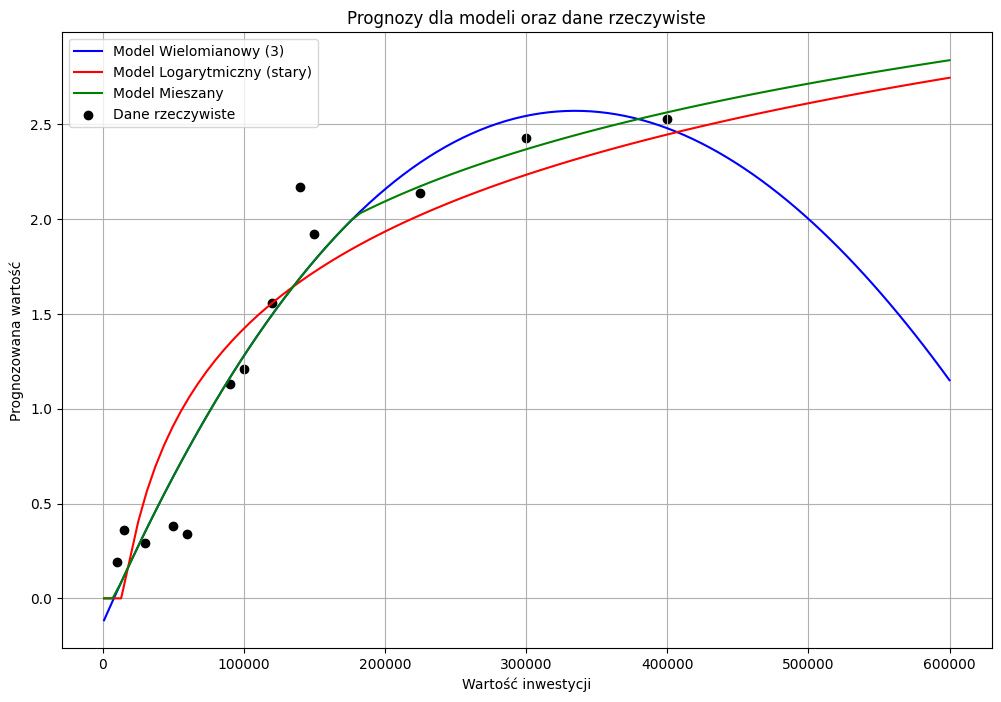

In [296]:
plt.figure(figsize=(12, 8))

investment_range_poly = np.linspace(1000, 600000, 100)
predictions_poly = [predict_investment_poly(inv) for inv in investment_range_poly]
plt.plot(investment_range_poly, predictions_poly, label='Model Wielomianowy (3)', color='b')

investment_range_log = np.linspace(1000, 600000, 100)
predictions_log_old = [predict_investment_log_old(inv) for inv in investment_range_log]
plt.plot(investment_range_log, predictions_log_old, label='Model Logarytmiczny (stary)', color='r')

plt.plot(investment_range, predictions_mixed, label='Model Mieszany', color='g')

plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='k', marker='o', label='Dane rzeczywiste')

plt.title('Prognozy dla modeli oraz dane rzeczywiste')
plt.xlabel('Wartość inwestycji')
plt.ylabel('Prognozowana wartość')
plt.legend()
plt.grid(True)
plt.show()

### Najlepsze modele

Model wielomianowy 3 stopnia okazał się najlepszy dla wartości do 200000, uzyskując najwyższe współczynniki determinacji \( R^2 \). Natomiast po 200000 model logarytmiczny lepiej odzwierciedla naturalnie rosnącą krzywiznę zmiennych. Dlatego zamiast stosować dwa różne modele, które lepiej sprawdzają się w różnych zakresach, implementujemy jeden model łączący oba podejścia. Oto jego szczegółowe wyniki:

- **Model Wielomianowy (stopień 3)**:
  - \( R^2 = 0.93 \)
  - Prognoza dla inwestycji 20,000: 0.19
  - Prognoza dla inwestycji 450,000: 2.29

- **Model Logarytmiczny**:
  - \( R^2 = 0.83 \)
  - Prognoza dla inwestycji 20,000: 0.23
  - Prognoza dla inwestycji 450,000: 2.53

- **Model Mix**:
  - \( R^2 = 0.94 \)
  - Prognoza dla inwestycji 20,000: 0.19
  - Prognoza dla inwestycji 450,000: 2.69

### Wnioski

Najlepszym rozwiązaniem będzie użycie Modelu Mix, który ma najlepszy współczynnik \( R^2 \) oraz dokładniejsze prognozy w porównaniu do poszczególnych modeli wielomianowego i logarytmicznego.
